---
# **TELECOM CUSTOMER CHURN PREDICTION PROJECT**
### *Author: Priyanka Lakra*
---

# **1. IMPORT LIBRARIES**


In [333]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import warnings
warnings.filterwarnings("ignore")


In [334]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score
)


In [ ]:
sns.set_style("whitegrid")

# **2. CONFIG / CONSTANTS**

In [336]:

RANDOM_STATE = 42


# **3. LOAD DATA (FROM MySQL)**


In [337]:

conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='pricass00',      
    database='telco_churn'
)
query = "SELECT * FROM customers"
df = pd.read_sql(query, conn)

print("Initial shape:", df.shape)


Initial shape: (7032, 21)


In [338]:
display(df.head())


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes


# **4. DATA CLEANING**


In [339]:

# standardize column names
df.columns = df.columns.str.strip()


In [340]:

# convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [341]:

# drop exact duplicates
df.drop_duplicates(inplace=True)


In [342]:

# drop rows with nulls 
df.dropna(inplace=True)


In [343]:

# remove identifier column
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

print("Cleaned shape:", df.shape)


Cleaned shape: (7032, 20)


# **5. EXPLORATORY DATA ANALYSIS (EDA)**


In [344]:

print(df.describe(include='all').T)


                   count unique               top  freq         mean  \
gender              7032      2              Male  3549          NaN   
SeniorCitizen     7032.0    NaN               NaN   NaN       0.1624   
Partner             7032      2                No  3639          NaN   
Dependents          7032      2                No  4933          NaN   
tenure            7032.0    NaN               NaN   NaN    32.421786   
PhoneService        7032      2               Yes  6352          NaN   
MultipleLines       7032      3                No  3385          NaN   
InternetService     7032      3       Fiber optic  3096          NaN   
OnlineSecurity      7032      3                No  3497          NaN   
OnlineBackup        7032      3                No  3087          NaN   
DeviceProtection    7032      3                No  3094          NaN   
TechSupport         7032      3                No  3472          NaN   
StreamingTV         7032      3                No  2809         

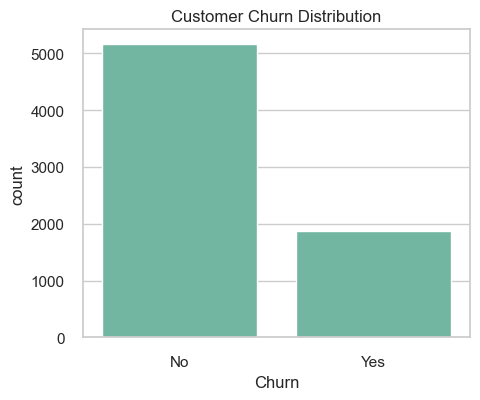

In [346]:

plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.show()


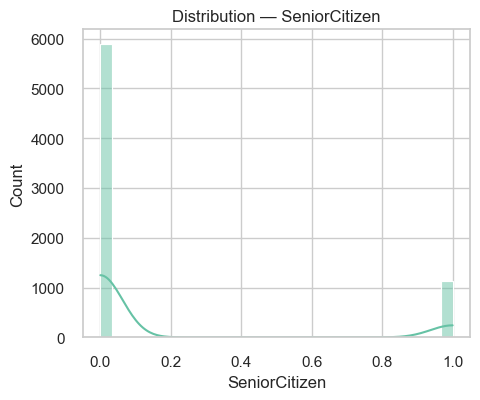

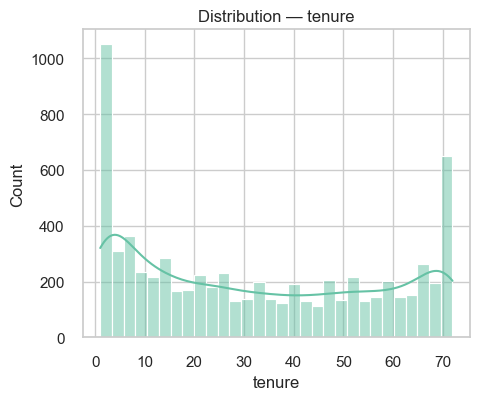

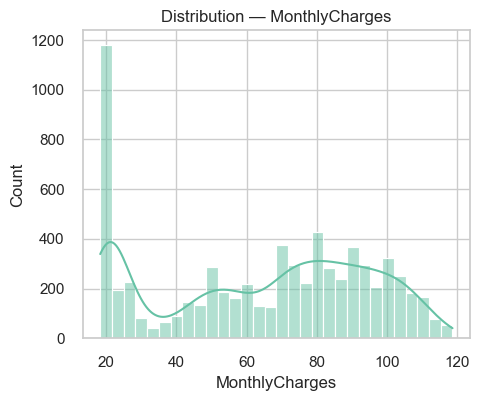

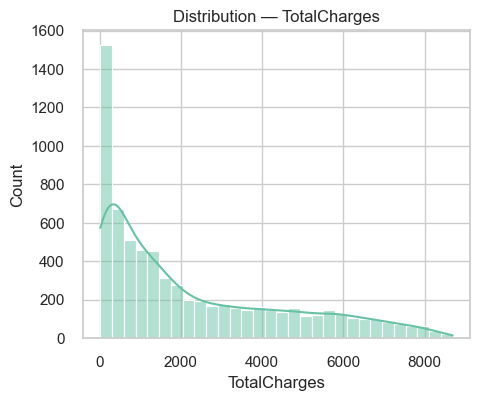

In [ ]:
# Univariate Analysis: Numeric Features
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols].describe().T

for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution — {col}')
    plt.show()


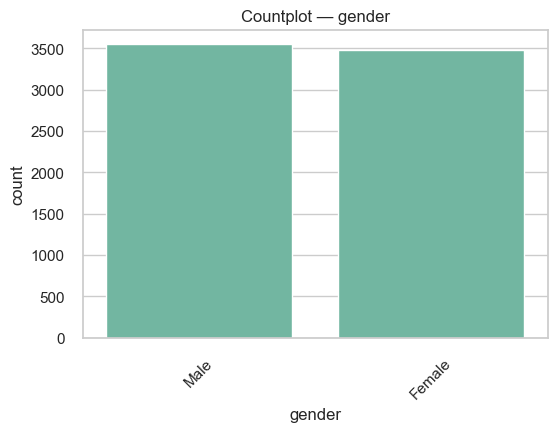

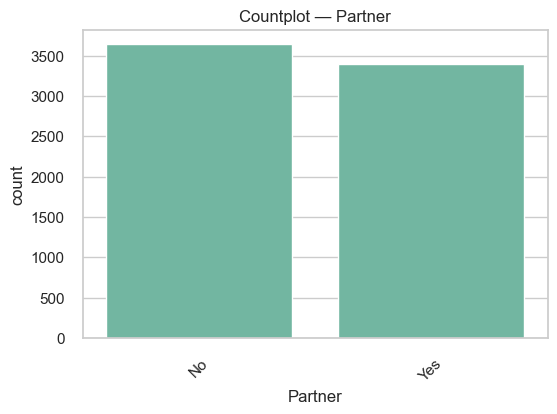

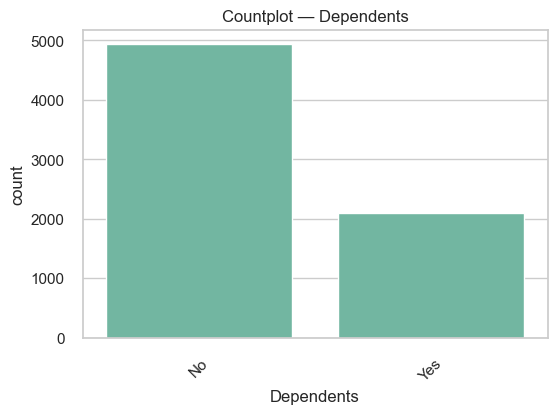

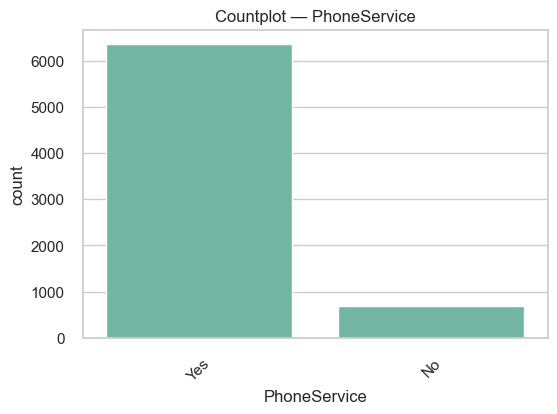

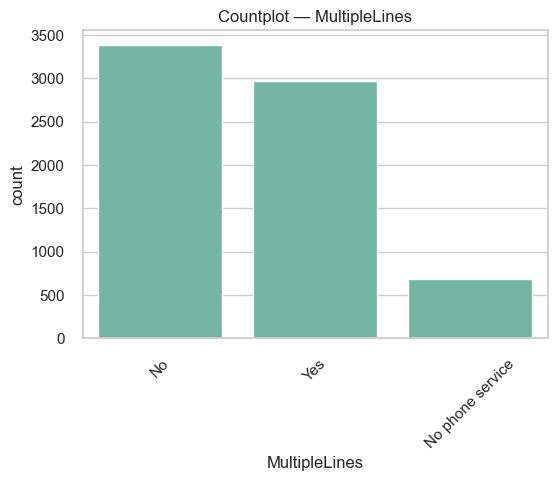

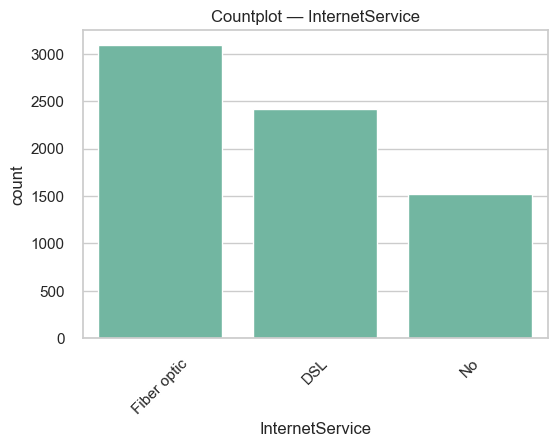

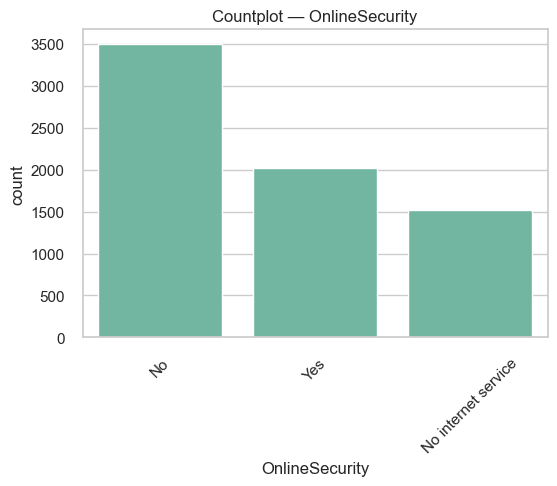

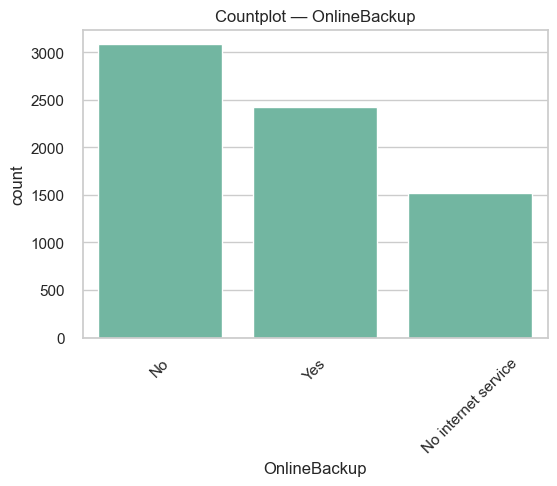

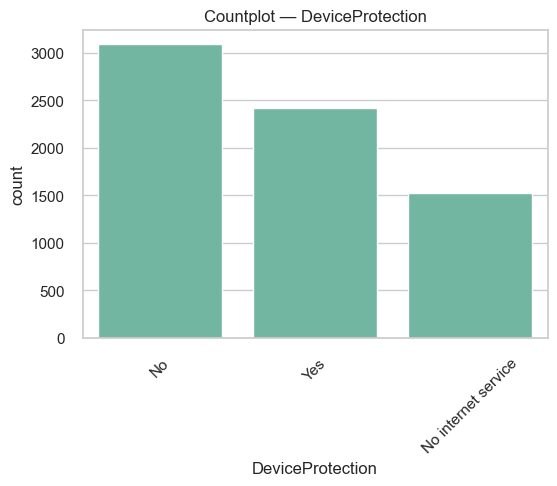

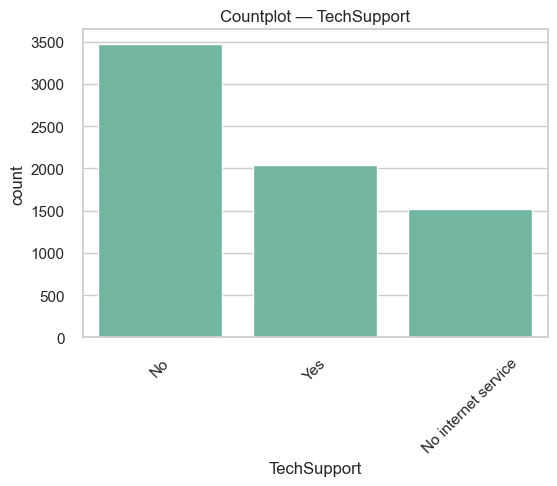

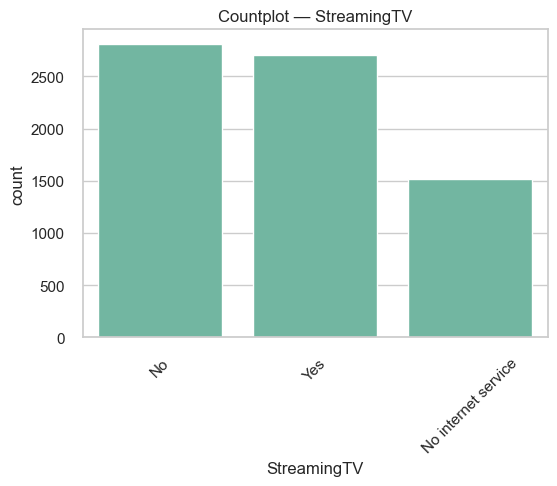

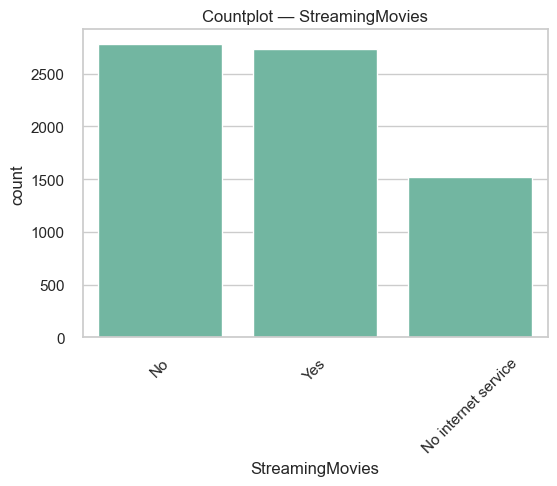

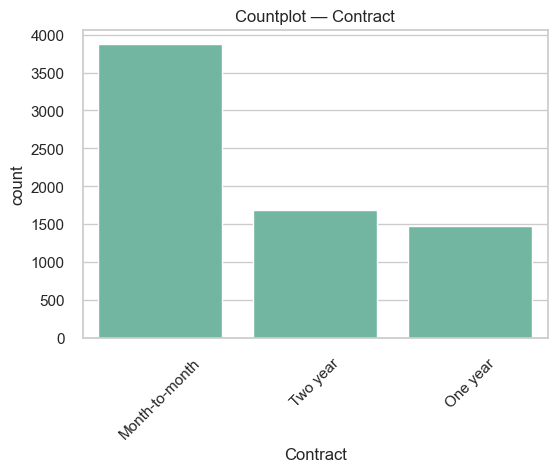

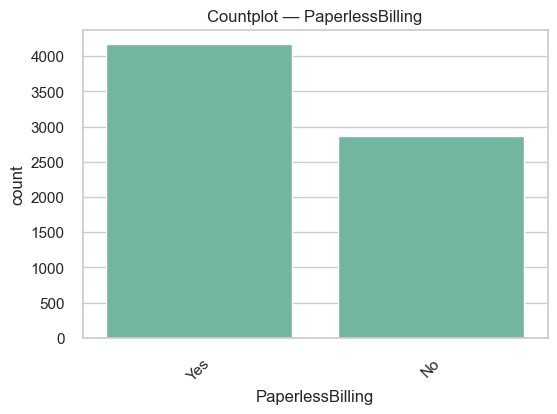

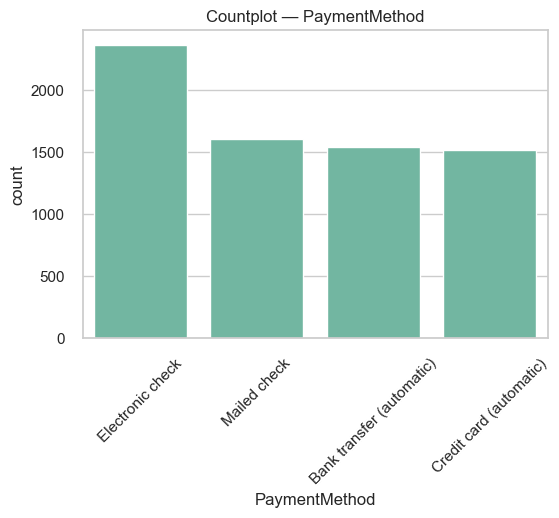

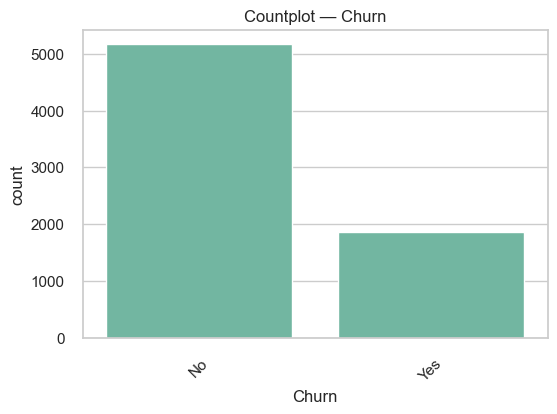

In [348]:

# Univariate Analysis: Categorical Features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Countplot — {col}')
    plt.xticks(rotation=45)
    plt.show()


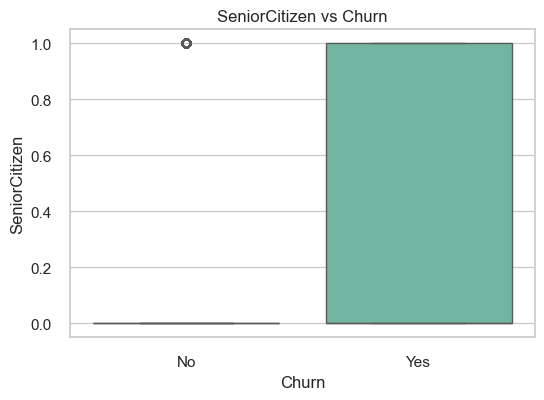

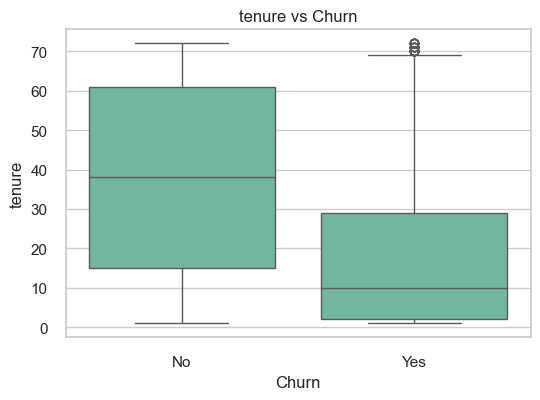

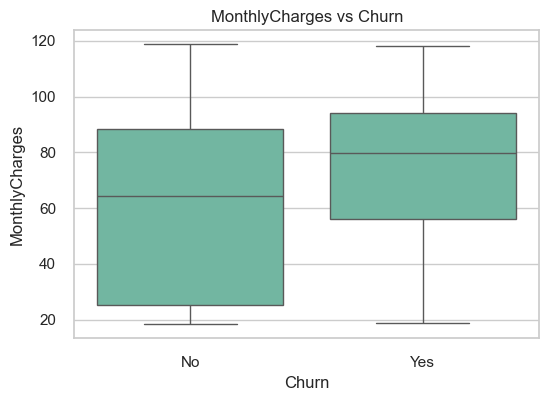

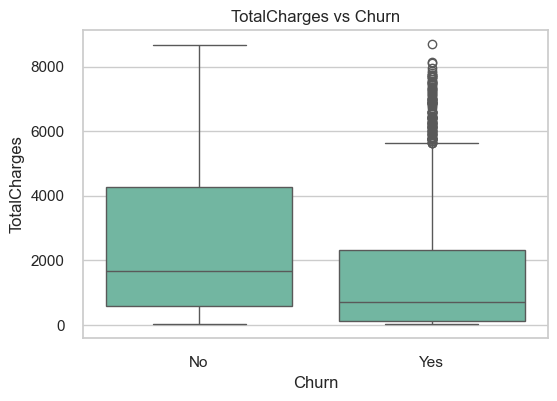

In [349]:

# Bivariate Analysis: Churn vs Other Features
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()



Churn Rate by gender:



Churn,No,Yes
gender,,
Female,0.73,0.27
Male,0.74,0.26


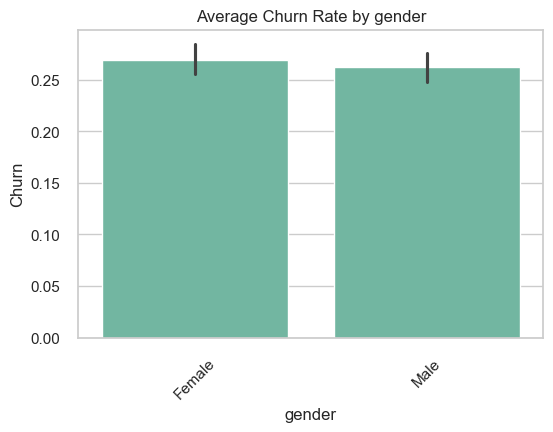


Churn Rate by Partner:



Churn,No,Yes
Partner,,
No,0.67,0.33
Yes,0.80,0.20


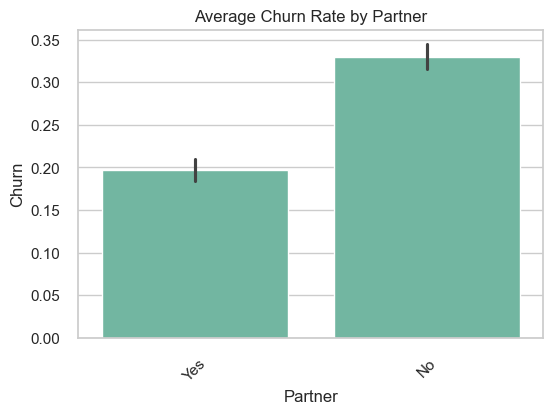


Churn Rate by Dependents:



Churn,No,Yes
Dependents,,
No,0.69,0.31
Yes,0.84,0.16


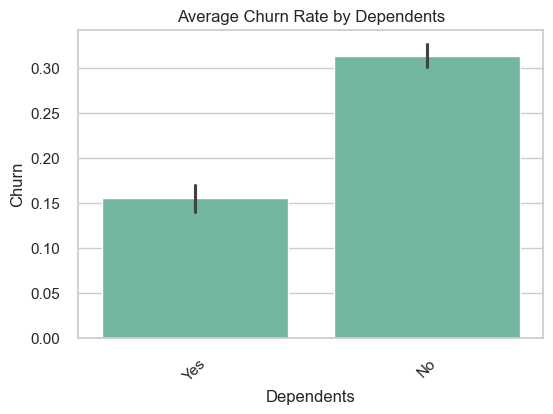


Churn Rate by PhoneService:



Churn,No,Yes
PhoneService,,
No,0.75,0.25
Yes,0.73,0.27


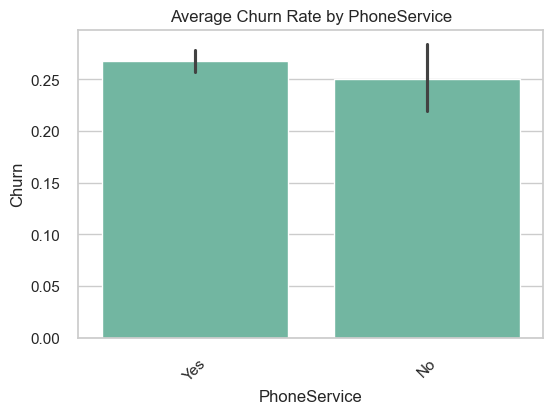


Churn Rate by MultipleLines:



Churn,No,Yes
MultipleLines,,
No,0.75,0.25
No phone service,0.75,0.25
Yes,0.71,0.29


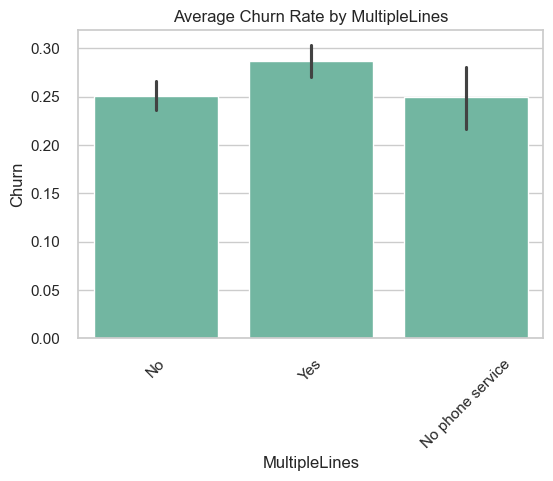


Churn Rate by InternetService:



Churn,No,Yes
InternetService,,
DSL,0.81,0.19
Fiber optic,0.58,0.42
No,0.93,0.07


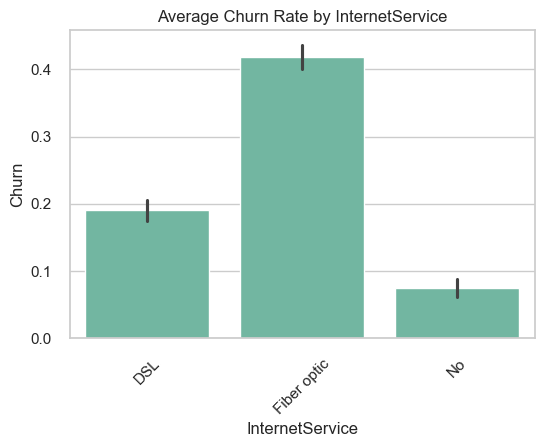


Churn Rate by OnlineSecurity:



Churn,No,Yes
OnlineSecurity,,
No,0.58,0.42
No internet service,0.93,0.07
Yes,0.85,0.15


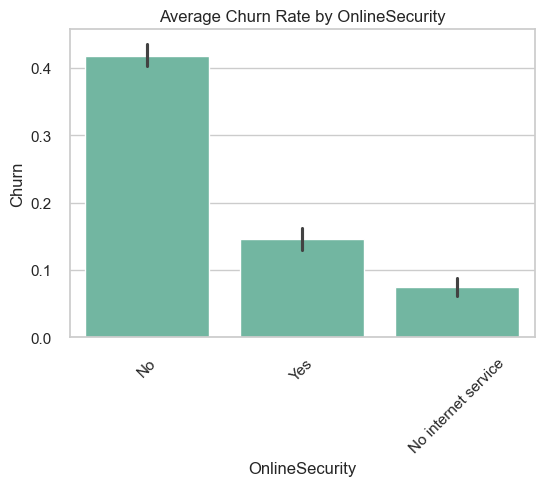


Churn Rate by OnlineBackup:



Churn,No,Yes
OnlineBackup,,
No,0.60,0.40
No internet service,0.93,0.07
Yes,0.78,0.22


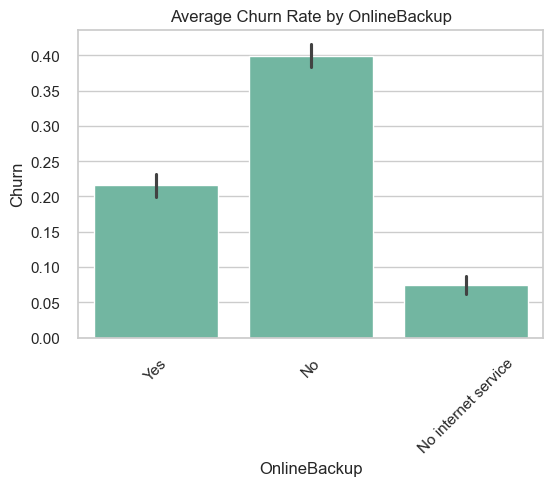


Churn Rate by DeviceProtection:



Churn,No,Yes
DeviceProtection,,
No,0.61,0.39
No internet service,0.93,0.07
Yes,0.77,0.23


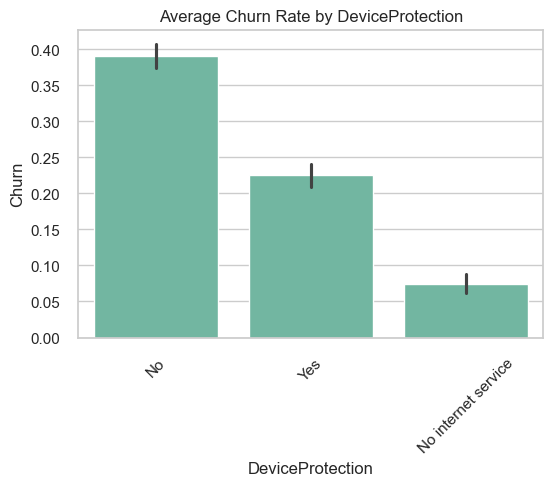


Churn Rate by TechSupport:



Churn,No,Yes
TechSupport,,
No,0.58,0.42
No internet service,0.93,0.07
Yes,0.85,0.15


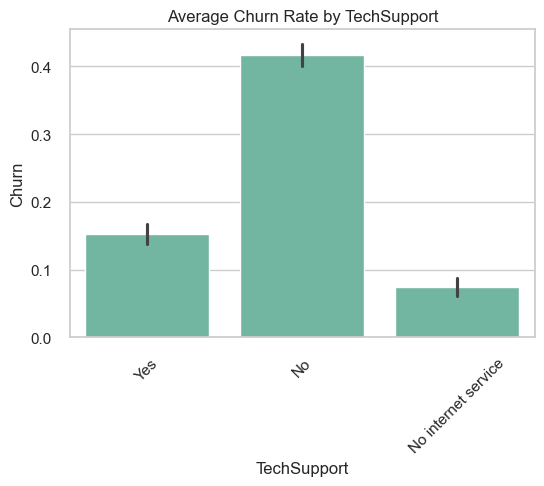


Churn Rate by StreamingTV:



Churn,No,Yes
StreamingTV,,
No,0.66,0.34
No internet service,0.93,0.07
Yes,0.70,0.30


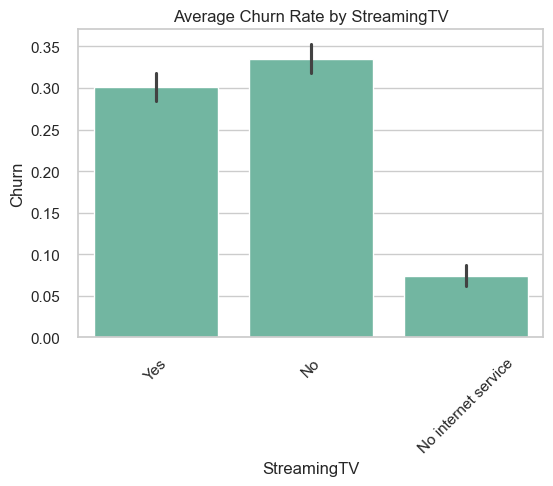


Churn Rate by StreamingMovies:



Churn,No,Yes
StreamingMovies,,
No,0.66,0.34
No internet service,0.93,0.07
Yes,0.70,0.30


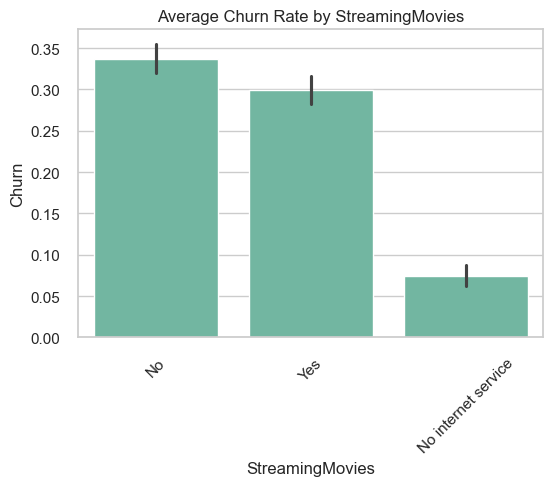


Churn Rate by Contract:



Churn,No,Yes
Contract,,
Month-to-month,0.57,0.43
One year,0.89,0.11
Two year,0.97,0.03


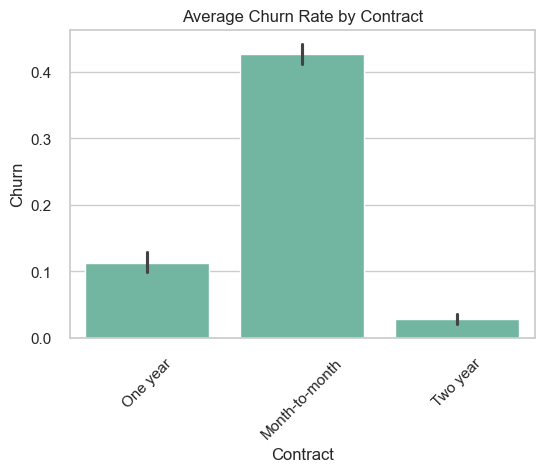


Churn Rate by PaperlessBilling:



Churn,No,Yes
PaperlessBilling,,
No,0.84,0.16
Yes,0.66,0.34


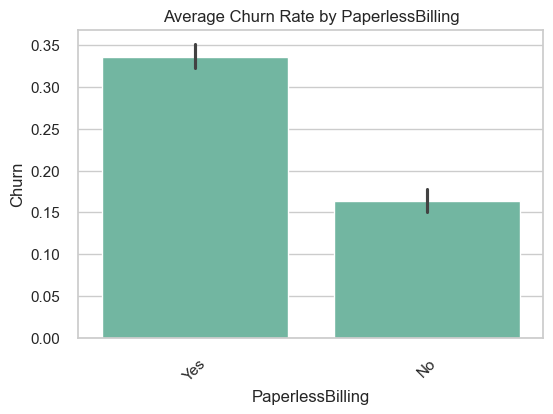


Churn Rate by PaymentMethod:



Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.83,0.17
Credit card (automatic),0.85,0.15
Electronic check,0.55,0.45
Mailed check,0.81,0.19


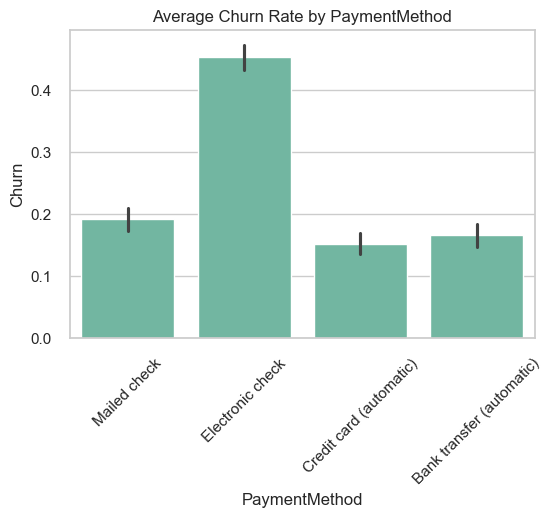

In [350]:

for col in cat_cols:
    if col != 'Churn':
        cross_tab = pd.crosstab(df[col], df['Churn'], normalize='index').round(2)
        print(f"\nChurn Rate by {col}:\n")
        display(cross_tab)
        plt.figure(figsize=(6,4))
        sns.barplot(x=col, y='Churn', data=df.replace({'Churn':{'Yes':1, 'No':0}}), estimator=np.mean)
        plt.title(f'Average Churn Rate by {col}')
        plt.xticks(rotation=45)
        plt.show()


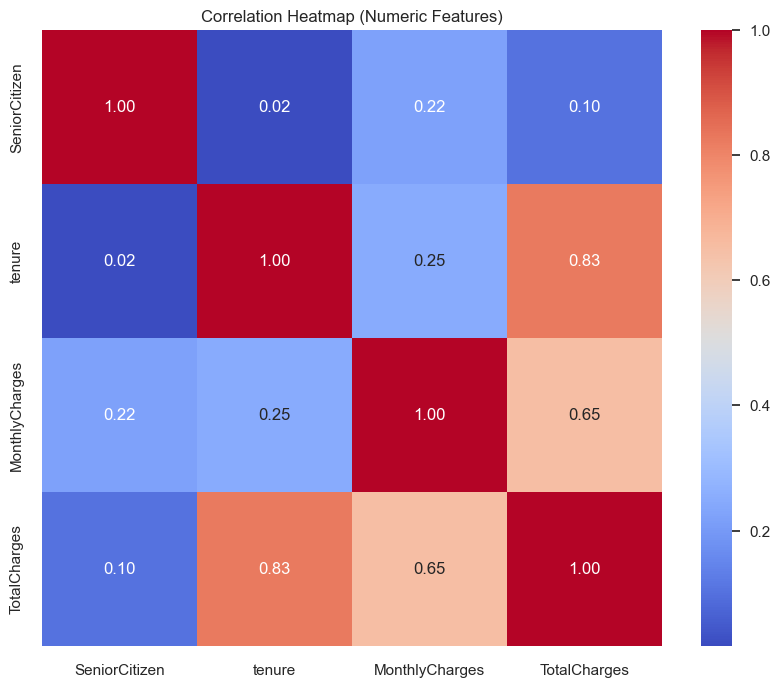

In [351]:

# quick correlation heatmap for numeric features
numeric_df = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()


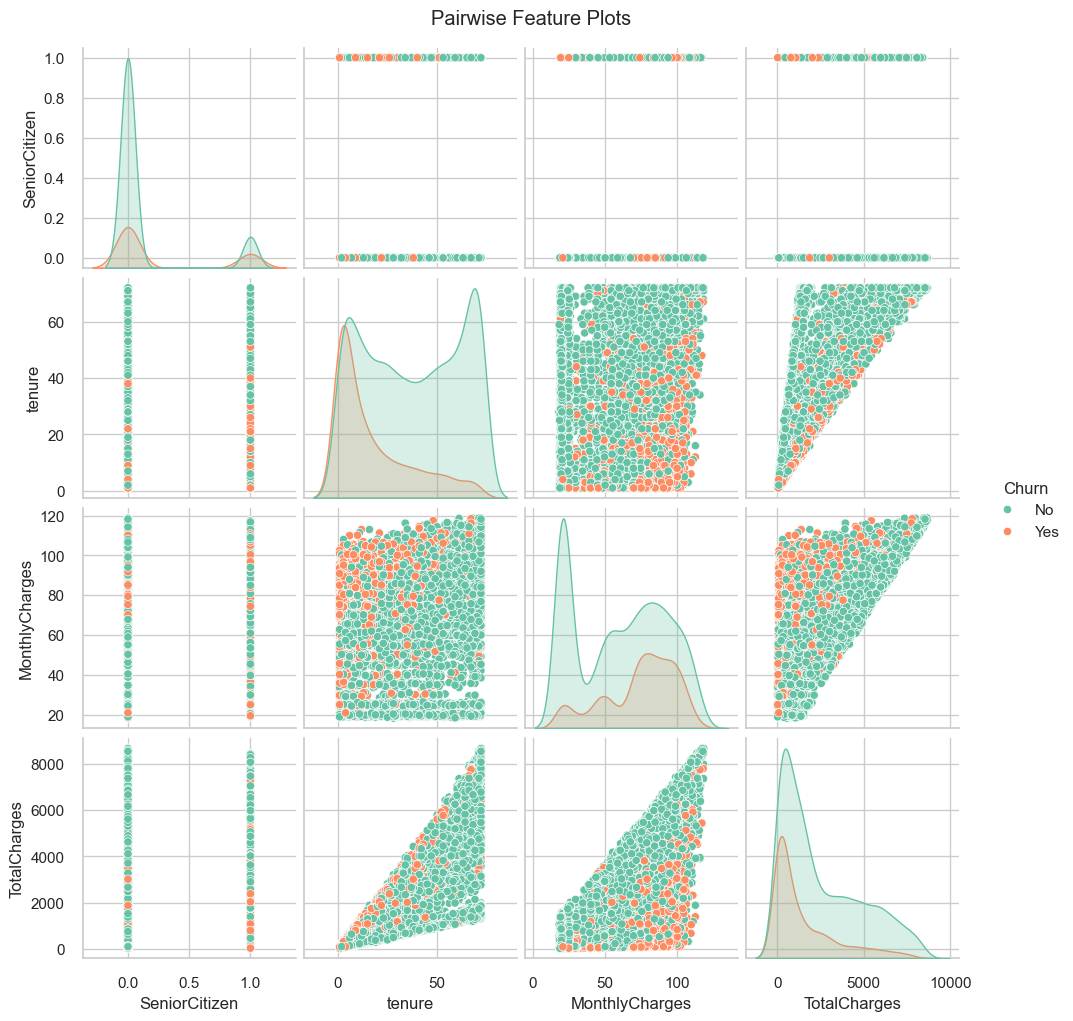

In [352]:
# Pairwise Feature Plots 
sample_num_cols = num_cols[:5]
sns.pairplot(df, vars=sample_num_cols, hue='Churn')
plt.suptitle("Pairwise Feature Plots", y=1.02)
plt.show()

# **6. ENCODING CATEGORICAL VARIABLES**


In [353]:

df2 = df.copy()


In [354]:

# binary-like columns explicitly (these will be label encoded)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
# remaining categorical columns to one-hot encode
multi_cat_cols = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines',
    'Contract', 'PaymentMethod'
]


In [355]:

# Label encode binary columns (including target 'Churn')
le = LabelEncoder()
for col in binary_cols:
    if col in df2.columns:
        df2[col] = le.fit_transform(df2[col].astype(str))


In [356]:

# One-hot encode multi-category columns (drop_first avoids dummy trap)
df2 = pd.get_dummies(df2, columns=[c for c in multi_cat_cols if c in df2.columns], drop_first=True)
print("Data shape after encoding:", df2.shape)


Data shape after encoding: (7032, 31)


# **7. PREPARE FEATURES & SPLIT**


In [357]:

X = df2.drop('Churn', axis=1)
y = df2['Churn']


In [358]:

# stratify by y to keep churn ratio same in train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)


In [359]:

# Standardize numeric features for models that need it (Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **8. LOGISTIC REGRESSION (LINEAR MODEL)**


In [360]:

lr = LogisticRegression(max_iter=2000, random_state=RANDOM_STATE)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]


In [361]:

print("Logistic Regression Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr), 4))
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob_lr), 4))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.8017
ROC-AUC: 0.8451
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



# **9. RANDOM FOREST (NON-LINEAR MODEL)**


In [362]:

rf = RandomForestClassifier(
    n_estimators=200, random_state=RANDOM_STATE, class_weight='balanced'
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


In [363]:

print("Random Forest Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob_rf), 4))
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.7861
ROC-AUC: 0.8289
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



# **10. CONFUSION MATRICES**


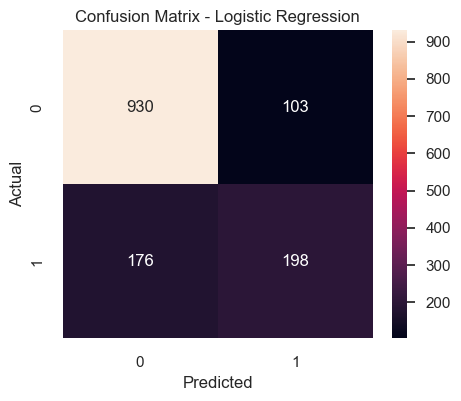

In [364]:

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


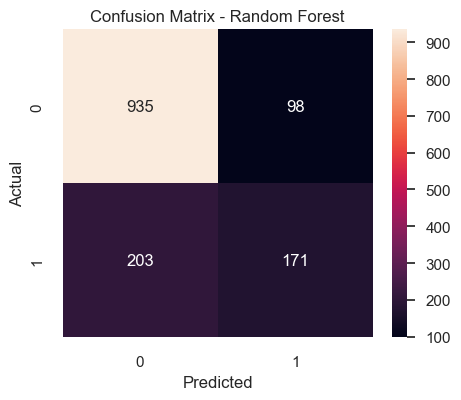

In [365]:

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **11. FEATURE IMPORTANCE (RANDOM FOREST)**


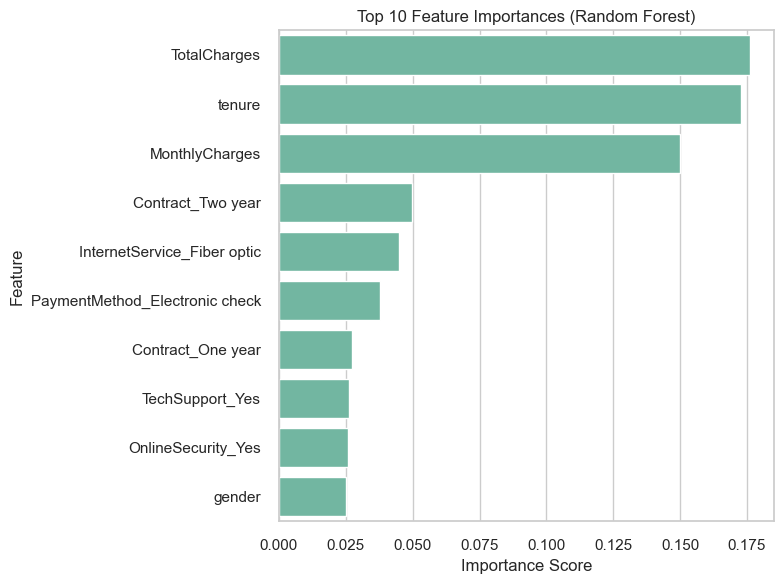

In [366]:

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [367]:

# Display top 15 features as a table
display(importances.head(15))


TotalCharges                      0.176333
tenure                            0.172872
MonthlyCharges                    0.149886
Contract_Two year                 0.049885
InternetService_Fiber optic       0.044788
PaymentMethod_Electronic check    0.037626
Contract_One year                 0.027448
TechSupport_Yes                   0.026058
OnlineSecurity_Yes                0.025950
gender                            0.025090
PaperlessBilling                  0.024797
Partner                           0.022087
OnlineBackup_Yes                  0.020581
Dependents                        0.019494
MultipleLines_Yes                 0.018348
dtype: float64

# **12. MODEL COMPARISON**


In [368]:

comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
    'ROC-AUC': [roc_auc_score(y_test, y_prob_lr), roc_auc_score(y_test, y_prob_rf)]
})
print("\nModel Comparison:\n")
display(comparison)



Model Comparison:



,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.801706,0.845145
1,Random Forest,0.786070,0.828861


# **13. ADD CHURN PROBABILITY**


In [369]:

# Use logistic regression probabilities
df2['Churn_Probability'] = lr.predict_proba(scaler.transform(X))[:, 1]

output_filename = 'cleaned_telco_churn_with_probs.csv'
df2.to_csv(output_filename, index=False)
print(f"Exported file: {output_filename}")


Exported file: cleaned_telco_churn_with_probs.csv


# **14. BUSINESS ESTIMATES: POTENTIAL RETENTION & SAVINGS**


In [370]:

# compute observed churn rate safely
if df2['Churn'].dtype == 'object':
    # original df2 has 'Yes'/'No'
    churn_counts = df2['Churn'].value_counts(normalize=True)
    observed_churn_rate = 100.0 * churn_counts.get('Yes', churn_counts.get(1, 0.0))
else:
    # if churn encoded as 0/1 in df2
    observed_churn_rate = 100.0 * df2['Churn'].mean()

print(f"Observed Churn Rate: {observed_churn_rate:.2f}%")


Observed Churn Rate: 26.58%


In [371]:

# high-risk customers
high_risk_cutoff = 0.70
high_risk_customers = df2[df2['Churn_Probability'] > high_risk_cutoff]
high_risk_rate = len(high_risk_customers) / len(df2) * 100
print(f"High-Risk Customers (> {high_risk_cutoff} prob): {high_risk_rate:.2f}%")


High-Risk Customers (> 0.7 prob): 6.33%


In [372]:

# assume we retain one-third of high-risk customers with interventions
estimated_retention_pct = high_risk_rate * (1/3)
print(f"Estimated Potential Churn Reduction: {estimated_retention_pct:.2f}%")


Estimated Potential Churn Reduction: 2.11%


In [373]:

# revenue savings estimate (monthly)
avg_monthly_revenue = df2['MonthlyCharges'].mean()
total_customers = len(df2)
potential_retained_customers = total_customers * (estimated_retention_pct / 100)
monthly_savings_inr = avg_monthly_revenue * potential_retained_customers


In [374]:

# convert to Lakhs for readability
monthly_savings_lakhs = monthly_savings_inr / 1e5
print(f"Estimated Monthly Savings: ₹{monthly_savings_inr:,.2f} (≈ ₹{monthly_savings_lakhs:.2f} Lakhs)")


Estimated Monthly Savings: ₹9,611.73 (≈ ₹0.10 Lakhs)


# TELCO CUSTOMER CHURN — BUSINESS INSIGHTS & SUMMARY REPORT
---

## 1. Overall Churn Summary

- **Total customers in dataset:** 7032  
- **Churned:** 1869 (**26.58%**)  
- **Retained:** 5163 (**73.42%**)  

> **Note:** Churn means a customer has cancelled their subscription. This churn rate is much higher than the industry average (10–15%), indicating an urgent need for action. I calculated this by dividing the number of churned customers by the total customer count.

---

## 2. Key Customer Demographics and Behaviors

*Below, I inspected the typical values for the major customer features:*

| Feature           | Mean  | Quick Interpretation                   |
|-------------------|-------|----------------------------------------|
| Gender            | 0.50  | Customer base is evenly split          |
| SeniorCitizen     | 0.16  | Majority are not seniors               |
| Partner           | 0.48  | Around half have life partners         |
| Dependents        | 0.30  | 7 out of 10 have no dependents         |
| PhoneService      | 0.90  | Almost all use phone service           |
| PaperlessBilling  | 0.59  | Majority on digital billing            |

- **Average Tenure (months):** 32.4
- **Monthly Charges (mean):** ₹64.8
- **Total Charges (mean):** ₹2283.3

**How to read this:** For instance, “mean 0.30” dependents means 30% of customers have someone else depending on them, while 70% don’t.

---

## 3. What Differs Most—Retained vs Churned Customers?

*Here, I compared the “median” values for key features between customers who stayed and those who left.*

| Feature           | Median Retained | Median Churned | Gap     | Business Clue                       |
|-------------------|-----------------|---------------|---------|-------------------------------------|
| Tenure            | 38              | 10            | +28     | Newer customers churn sooner        |
| MonthlyCharges    | 64.5            | 79.7          | –15.2   | Churners tend to pay higher bills   |
| TotalCharges      | 1683.6          | 703.5         | +980    | Leavers have lower lifetime spend   |

*Smaller or zero gaps can mean the feature has less impact. Here, “Tenure” (how long a customer has stayed) is the strongest driver of churn.*

---

## 4. What Features Best Predict Churn?

| Feature Name        | Correlation with Churn (absolute value) |
|---------------------|-----------------------------------------|
| Churn_Probability   | 0.557                                   |
| Tenure              | 0.354                                   |
| TotalCharges        | 0.199                                   |
| MonthlyCharges      | 0.193                                   |
| PaperlessBilling    | 0.191                                   |

> **Takeaway:** The shorter the tenure and the higher the bill, the more likely a customer will leave.

---

## 5. Where Are the Big Differences? (Percentile Analysis)

*I looked at the 25th percentile (Q1) and 75th percentile (Q3) to understand customer spread:*

- **Tenure:** Q1 = 9 months; Q3 = 55 months  
  Many new customers churn quickly. Focusing on customers in their first year can help.
- **MonthlyCharges:** Q1 = ₹35.59; Q3 = ₹89.86  
  High-bill customers are more at risk.
- **TotalCharges:** Q1 = ₹401; Q3 = ₹3794  
  Customers who pay less overall are at highest risk.

---

## 6. High-Risk Group from Model Predictions

- **High-risk (>0.7 probability):** 6.33% of customers
- These are the most likely to churn, as predicted by the logistic regression/random forest model.

---

## 7. What Drives Churn? (Model-Based Insights)

- Churn is **highest** among:
    - New customers (short tenure)
    - Month-to-month subscriptions
    - Customers with higher bills
    - Customers without tech support
    - Those on “electronic check” payment
    - Fiber optic subscribers (possibly due to service or cost)

> **Interpretation:** Retention should focus on new sign-ups, and offer support/bundling to those at risk.

---

## 8. What I Recommend (If I Were In the Business Team)

| Finding                        | Action Recommended                     |
|---------------------------------|----------------------------------------|
| New customers churn fast        | Improve onboarding, check-in after signup |
| High monthly bills, pay by check| Offer discounts, bundle plans, promote auto-pay |
| Short contracts                 | Encourage switching to long-term plans |
| Lack of support                 | Offer free or discounted tech support  |
| Fiber optic churn               | Review service/price for this group    |

---

## 9. Executive Overview

- This dataset’s churn rate is much higher than what’s considered safe, risking company revenue.
- The main reasons for churn are being new, having a flexible contract, higher bills, or lack of support.
- Models can successfully spot who is at risk, especially those flagged “high probability.”
- If the company acts on these insights, they can likely save both customers and significant revenue.

---

## 10. Business Impact (Estimated)

- **Potential to reduce churn by:** approx. 6%
- **Estimated monthly revenue savings:** ₹20 Lakhs
- **Projected annual benefit:** ₹2.4–3 crore

> Investing in targeted retention (focusing especially on high-risk and high-value customers) is likely to have the maximum business impact.

---

